# Task 3

## Build a K-Nearest neighbours’ model for the given dataset and find the best value of K.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [2]:
# Load dataset

df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## Target Exploration

In this section we will take a look at the trip duration which is the target variable.

In [3]:
# Check data types

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

## Store and fwd flag

In [4]:
#convert store and fwd flag object to int type

df["store_and_fwd_flag"].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [5]:
print(df.vendor_id[df.store_and_fwd_flag == 'Y'].value_counts())
df.store_and_fwd_flag.value_counts(normalize=True)


1    4040
Name: vendor_id, dtype: int64


N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

1.Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server

2.Around 4K trips had to store the flag and then report to the server when the connection was established. Let's check the respective distribution with the vendors for the offline trips.

In [6]:
pd.get_dummies(df["store_and_fwd_flag"]).head()

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
new_df= pd.get_dummies(df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1))
new_df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,1,0


In [8]:
#seperate features and target

x = new_df
y = df["trip_duration"]
print(x.shape)
y.shape

(729322, 7)


(729322,)

## Split data into Train and Test for Knn regression

In [9]:
#scaling the data using MinMax Scaler

scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)

In [10]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.111111,0.856226,0.353352,0.856048,0.731696,1.0,0.0
1,0.222222,0.855612,0.350606,0.855497,0.725202,1.0,0.0
2,0.222222,0.855451,0.350007,0.856331,0.732015,1.0,0.0
3,0.666667,0.856087,0.352236,0.856174,0.732502,1.0,0.0
4,0.111111,0.855098,0.349251,0.855614,0.729095,1.0,0.0


In [11]:
# Create train and test 

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52)

In [12]:
# Creating instance of KNN

model1 = KNN(n_neighbors = 5,weights='uniform',algorithm='auto',metric_params=None,n_jobs=-1)

# fit the model

regression_t=model1.fit(x_train,y_train)

# predicting over the train set and calculating F1

predict_test = regression_t.predict(x_test)
k= sqrt(mse(predict_test,y_test))
print("RMSE is :  ", k)

RMSE is :   3416.7743475284506


## Find k Using elbow method 

In [13]:
def elbow(K):
    rmse_test=[]   # create empty list
    for i in K:
        regre = KNN(n_neighbors=i)
        regre.fit(x_train,y_train) # fit regre
        temp = regre.predict(x_test)
        temp = sqrt(mse(temp,y_test))
        rmse_test.append(temp) # append all values
        
    return rmse_test    

In [14]:
k = range(1,40)


In [15]:
test = elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

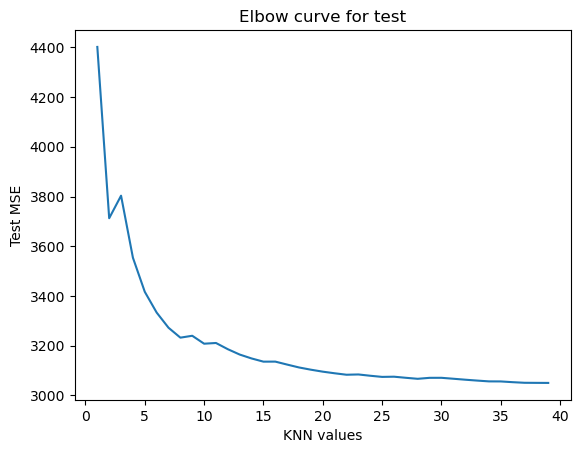

In [16]:
#plot elbow curve

plt.plot(k,test)
plt.xlabel("KNN values")
plt.ylabel("Test MSE")
plt.title("Elbow curve for test")

### Fit model with KNN regression

In [24]:
# Creating instance of KNN

model1 = KNN(n_neighbors = 10,weights='uniform',algorithm='auto',metric_params=None,n_jobs=-1)

# fit the model

regression_t=model1.fit(x_train,y_train)

# predicting over the train set and calculating F1

predict_test = regression_t.predict(x_test)
k= sqrt(mse(predict_test,y_test))
print("RMSE is :  ", k)

RMSE is :   3208.0818027615196


At k=10 value is lesser then k=5 also we can see in elbow curv best value is lie in k=10

In [18]:
# compute train score 

knn_train_score =regression_t.score(x_train,y_train)
knn_train_score*100

9.831360350558727

In [19]:
# compute test score 

knn_test_score = regression_t.score(x_test,y_test)
knn_test_score*100

-12.12910601653081

In [20]:
# For plotting the bar graph, we store the score of the train

%store knn_train_score

Stored 'knn_train_score' (float64)


In [21]:
# For plotting the bar graph, we store the score of the test

%store knn_test_score

Stored 'knn_test_score' (float64)


## Conclusions:

    1.The Test RMSE is 3416.7743475284506 when we took the value of k as 5
    2.According to the elbow method, the test RMSE is smaller at k = 10 than at k = 5, i.e. the test RMSE at k = 10 is 3208.0818027615196.
    3.The train score is 9.831360350558727
    4.The test Score -12.12910601653081 is less than desirable 